<a href="https://colab.research.google.com/github/harsha8745/-harsha8745-TF2-and-Keras-Deep-Learning/blob/main/TF2_and_Keras_Deep_Learning_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras Syntax Basics

## Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

Saving fake_reg.csv to fake_reg.csv


{'fake_reg.csv': b'price,feature1,feature2\r\n461.52792939358096,999.7875575188533,999.7660961983587\r\n548.1300114599096,998.8616149123676,1001.0424031538957\r\n410.2971616727477,1000.0702669091074,998.8440146285707\r\n540.3822198140741,999.9522512998311,1000.4409403097619\r\n546.0245529164561,1000.446010934907,1000.3385312934138\r\n542.9836715980255,999.693183680952,1000.6280062225202\r\n555.4856641557159,1000.2758550559212,1000.444949437216\r\n417.569724534508,1000.414204534198,998.8784862396268\r\n373.14653121679595,1000.0166064839841,998.475996714074\r\n633.3502924774541,999.9056456127553,1001.5944813896191\r\n624.247092064156,1002.0999754232563,1000.4889149679746\r\n475.3724172064315,1000.2308192953344,999.5639425977989\r\n600.3684448550833,999.7043113938889,1001.3861565774105\r\n532.8329517531153,1000.7715755888737,999.939106918522\r\n472.8353627974771,999.3229434497522,1000.055359565865\r\n506.31229096481167,1000.3794028860226,999.8292801841649\r\n508.4144059952209,998.51313134

In [ ]:
df = pd.read_csv('fake_reg.csv')

In [ ]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

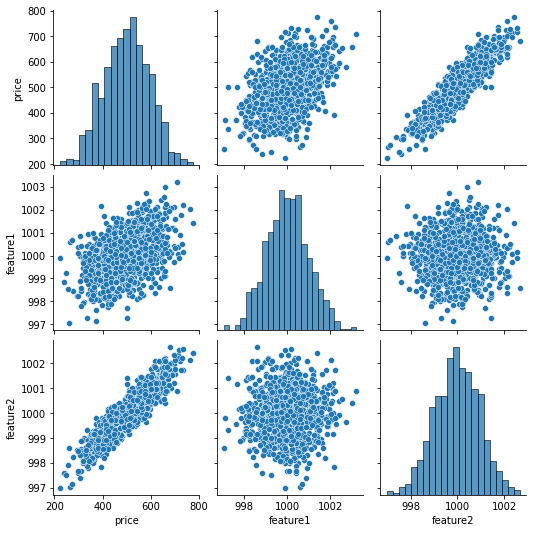

In [ ]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
help(MinMaxScaler)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
help(Sequential)

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [ ]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [ ]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [ ]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

## Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [ ]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 998us/step - loss: 258489.1345
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256465.8865
Epoch 3/250
22/22 [==============================] - 0s 899us/step - loss: 254457.1590
Epoch 4/250
22/22 [==============================] - 0s 889us/step - loss: 255847.0564
Epoch 5/250
22/22 [==============================] - 0s 922us/step - loss: 260215.5503
Epoch 6/250
22/22 [==============================] - 0s 881us/step - loss: 260022.3207
Epoch 7/250
22/22 [==============================] - 0s 926us/step - loss: 261730.5469
Epoch 8/250
22/22 [==============================] - 0s 818us/step - loss: 257595.6800
Epoch 9/250
22/22 [==============================] - 0s 890us/step - loss: 258344.5421
Epoch 10/250
22/22 [==============================] - 0s 764us/step - loss: 255936.9518
Epoch 11/250
22/22 [==============================] - 0s 874us/step - loss: 256938.4069
Epoch 12/250
22/22 [=======================

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [ ]:
model.history.history

{'loss': [256704.453125,
  256664.40625,
  256626.125,
  256585.78125,
  256541.28125,
  256492.046875,
  256437.625,
  256376.875,
  256309.234375,
  256234.46875,
  256152.109375,
  256061.34375,
  255961.921875,
  255852.609375,
  255733.6875,
  255603.390625,
  255461.234375,
  255307.203125,
  255139.703125,
  254958.421875,
  254761.8125,
  254550.171875,
  254321.09375,
  254075.21875,
  253811.125,
  253528.234375,
  253224.921875,
  252900.109375,
  252552.28125,
  252181.46875,
  251787.515625,
  251368.609375,
  250921.921875,
  250448.0625,
  249946.40625,
  249415.71875,
  248855.84375,
  248263.0625,
  247636.984375,
  246974.28125,
  246277.8125,
  245539.203125,
  244750.828125,
  243910.15625,
  243016.828125,
  242072.40625,
  241073.03125,
  240024.734375,
  238920.0,
  237754.46875,
  236524.53125,
  235234.8125,
  233884.0625,
  232464.9375,
  230973.921875,
  229410.8125,
  227784.359375,
  226093.78125,
  224314.703125,
  222464.28125,
  220534.3125,
  218523.046

In [ ]:
loss = model.history.history['loss']

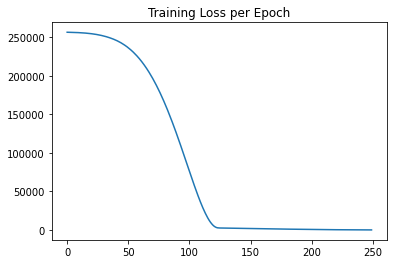

In [ ]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
loss_df = pd.DataFrame(model.history.history)

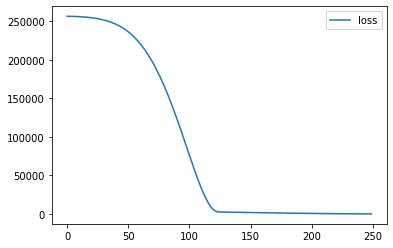

In [ ]:
loss_df.plot()

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [ ]:
model.metrics_names

['loss']

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

63.364532470703125

In [ ]:
test_score

62.93233108520508

### Further Evaluations

In [ ]:
yhat = model.predict(X_test)

In [ ]:
yhat

array([[412.80768],
       [616.99194],
       [587.12646],
       [570.0853 ],
       [378.731  ],
       [575.8044 ],
       [517.5422 ],
       [462.3315 ],
       [548.5476 ],
       [451.32376],
       [605.94385],
       [545.1211 ],
       [425.88748],
       [416.64856],
       [640.7168 ],
       [442.16226],
       [507.58124],
       [652.8369 ],
       [654.2912 ],
       [561.89056],
       [347.40622],
       [449.93362],
       [392.3085 ],
       [387.8893 ],
       [563.8655 ],
       [605.9813 ],
       [532.0301 ],
       [433.72568],
       [648.08606],
       [420.20898],
       [446.93735],
       [487.4929 ],
       [443.64047],
       [672.4979 ],
       [429.64844],
       [425.2951 ],
       [500.97025],
       [548.4637 ],
       [512.142  ],
       [405.5139 ],
       [611.9003 ],
       [422.80212],
       [598.7477 ],
       [449.36774],
       [503.31503],
       [575.57495],
       [657.834  ],
       [491.6167 ],
       [330.73148],
       [487.98178],


In [ ]:
yte_df = pd.DataFrame(y_test,columns=['Test Y'])

In [ ]:
yte_df

Test Y
0    402.296319
1    624.156198
2    582.455066
3    578.588606
4    371.224104
..          ...
295  525.704657
296  502.909473
297  612.727910
298  417.569725
299  410.538250

[300 rows x 1 columns]

In [ ]:
yhat = pd.Series(yhat.reshape(300,))

In [ ]:
yhat

0      412.807678
1      616.991943
2      587.126465
3      570.085327
4      378.730988
          ...    
295    529.526123
296    519.192444
297    603.760437
298    422.732208
299    418.839508
Length: 300, dtype: float32

In [ ]:
pred_df = pd.concat([yte_df,yhat],axis=1)

In [ ]:
pred_df.columns = ['Test Y','Model Predictions']

In [ ]:
pred_df

Test Y  Model Predictions
0    402.296319         412.807678
1    624.156198         616.991943
2    582.455066         587.126465
3    578.588606         570.085327
4    371.224104         378.730988
..          ...                ...
295  525.704657         529.526123
296  502.909473         519.192444
297  612.727910         603.760437
298  417.569725         422.732208
299  410.538250         418.839508

[300 rows x 2 columns]

Let's compare to the real test labels!

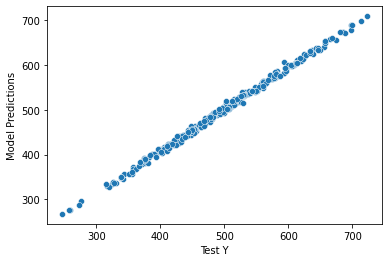

In [ ]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [ ]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

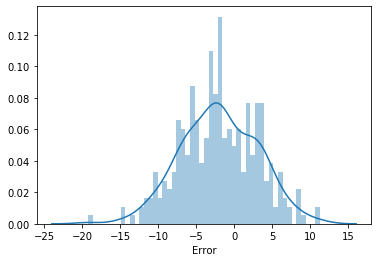

In [ ]:
sns.distplot(pred_df['Error'],bins=50)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse

In [ ]:
mae(pred_df['Test Y'],pred_df['Model Predictions'])

6.49471795769983

In [ ]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [ ]:
mse(pred_df['Test Y'],pred_df['Model Predictions'])

62.93233927692879

In [ ]:
# Essentially the same thing, difference just due to precision
test_score

62.93233108520508

In [ ]:
#RMSE
test_score**0.5

7.932990046962436

## Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [ ]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [ ]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

array([[428.23224]], dtype=float32)

## Saving and Loading a Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
pretrained_model = load_model('my_model.h5')

In [ ]:
pretrained_model.predict(new_gem)

array([[428.23224]], dtype=float32)

#Keras Regression Project

Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kc_house_data.csv to kc_house_data.csv


{'kc_house_data.csv': b'id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15\r\n7129300520,10/13/2014,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650\r\n6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639\r\n5631500400,2/25/2015,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062\r\n2487200875,12/9/2014,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000\r\n1954400510,2/18/2015,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503\r\n7237550310,5/12/2014,1.23E+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930\r\n1321400060,6/27/2014,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819\r\n2008000270,1/15/2015,291850,3,1.5,1060,9711,1,0,0,3,7

In [ ]:
df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().transpose()

count          mean  ...           75%           max
id             21597.0  4.580474e+09  ...  7.308900e+09  9.900000e+09
price          21597.0  5.402966e+05  ...  6.450000e+05  7.700000e+06
bedrooms       21597.0  3.373200e+00  ...  4.000000e+00  3.300000e+01
bathrooms      21597.0  2.115826e+00  ...  2.500000e+00  8.000000e+00
sqft_living    21597.0  2.080322e+03  ...  2.550000e+03  1.354000e+04
sqft_lot       21597.0  1.509941e+04  ...  1.068500e+04  1.651359e+06
floors         21597.0  1.494096e+00  ...  2.000000e+00  3.500000e+00
waterfront     21597.0  7.547345e-03  ...  0.000000e+00  1.000000e+00
view           21597.0  2.342918e-01  ...  0.000000e+00  4.000000e+00
condition      21597.0  3.409825e+00  ...  4.000000e+00  5.000000e+00
grade          21597.0  7.657915e+00  ...  8.000000e+00  1.300000e+01
sqft_above     21597.0  1.788597e+03  ...  2.210000e+03  9.410000e+03
sqft_basement  21597.0  2.917250e+02  ...  5.600000e+02  4.820000e+03
yr_built       21597.0  1.971000e+03  ...  1.997000e+03  2.015000e+03
yr_renovated   21597.0  8.446479e+01  ...  0.000000e+00  2.015000e+03
zipcode        21597.0  9.807795e+04  ...  9.811800e+04  9.819900e+04
lat            21597.0  4.756009e+01  ...  4.767800e+01  4.777760e+01
long           21597.0 -1.222140e+02  ... -1.221250e+02 -1.213150e+02
sqft_living15  21597.0  1.986620e+03  ...  2.360000e+03  6.210000e+03
sqft_lot15     21597.0  1.275828e+04  ...  1.008300e+04  8.712000e+05

[20 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


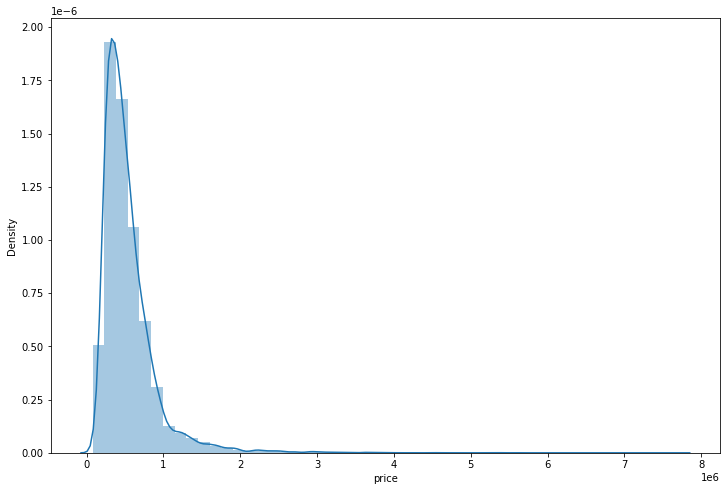

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


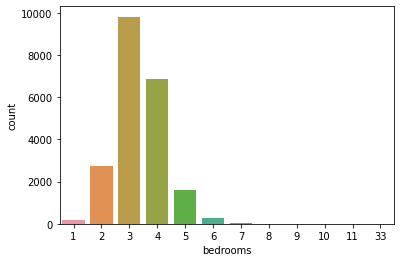

In [ ]:
sns.countplot(df['bedrooms'])

In [ ]:
df.corr()["price"].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

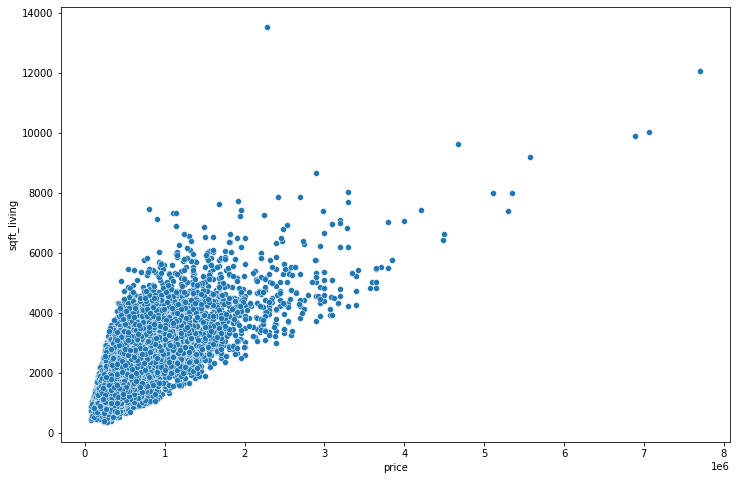

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

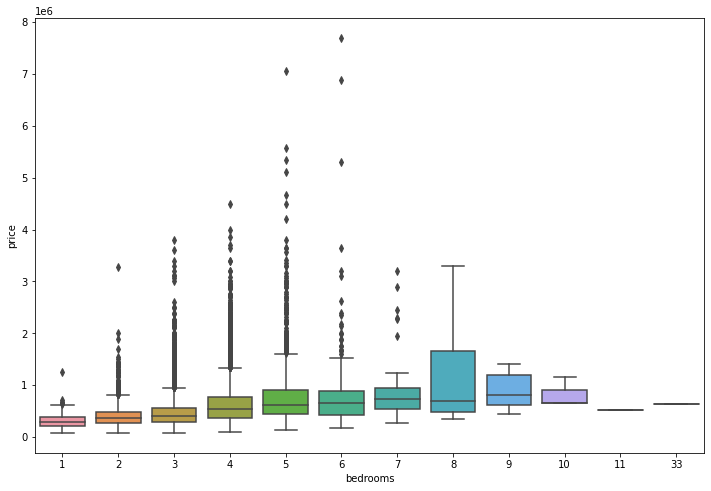

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

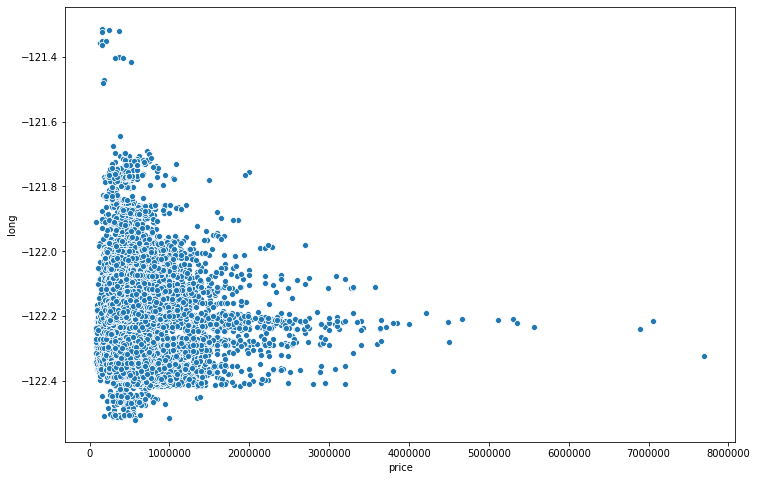

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

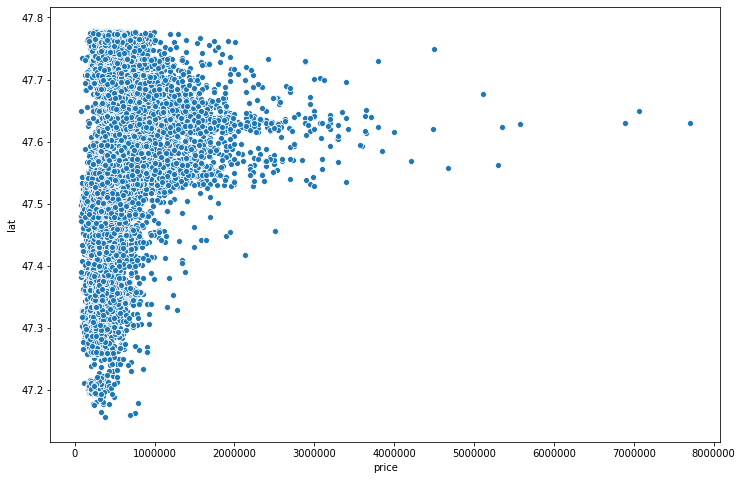

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

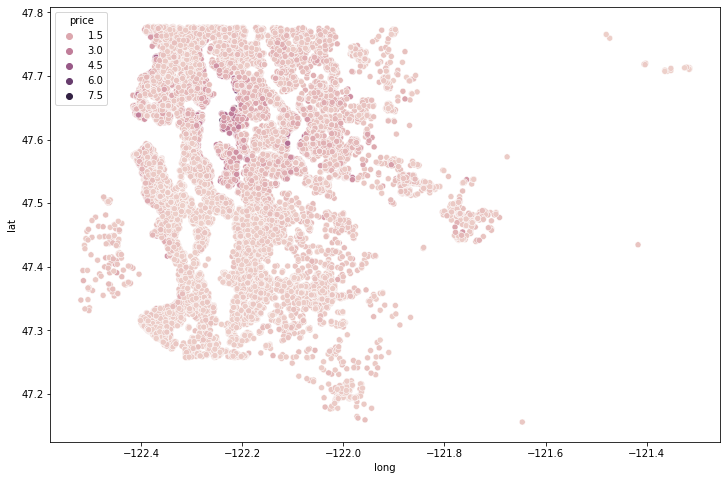

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

id        date      price  ...     long  sqft_living15  sqft_lot15
7245   6762700020  10/13/2014  7700000.0  ... -122.323           3940        8800
3910   9808700762   6/11/2014  7060000.0  ... -122.214           3930       25449
9245   9208900037   9/19/2014  6890000.0  ... -122.240           4540       42730
4407   2470100110    8/4/2014  5570000.0  ... -122.233           3560       24345
1446   8907500070   4/13/2015  5350000.0  ... -122.220           4600       21750
1313   7558700030   4/13/2015  5300000.0  ... -122.210           4320       24619
1162   1247600105  10/20/2014  5110000.0  ... -122.211           3430       26788
8085   1924059029   6/17/2014  4670000.0  ... -122.210           3270       10454
2624   7738500731   8/15/2014  4500000.0  ... -122.280           3030       23408
8629   3835500195   6/18/2014  4490000.0  ... -122.219           3720       14592
12358  6065300370    5/6/2015  4210000.0  ... -122.189           4740       19329
4145   6447300265  10/14/2014  4000000.0  ... -122.224           3140       15996
2083   8106100105  11/14/2014  3850000.0  ... -122.222           4620       22748
7028    853200010    7/1/2014  3800000.0  ... -122.220           5070       20570
19002  2303900100   9/11/2014  3800000.0  ... -122.370           3430       45302
16288  7397300170   5/30/2014  3710000.0  ... -122.234           2980       19602
18467  4389201095   5/11/2015  3650000.0  ... -122.213           4190       11275
6502   4217402115   4/21/2015  3650000.0  ... -122.277           3510       15810
15241  2425049063   9/11/2014  3640000.0  ... -122.241           3820       25582
19133  3625049042  10/11/2014  3640000.0  ... -122.236           2910       17600

[20 rows x 21 columns]

In [ ]:
len(df)*(0.01)

215.97

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

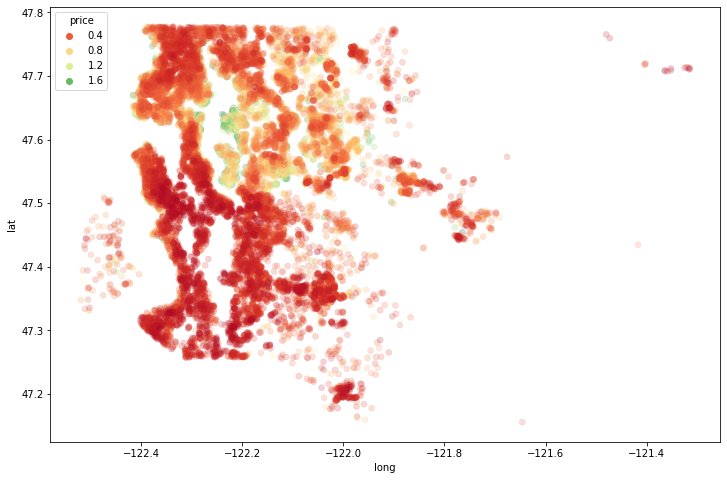

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

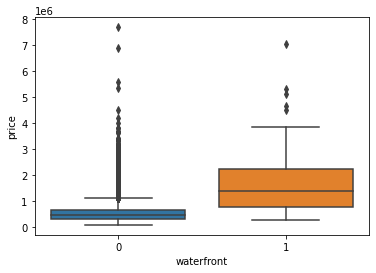

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [ ]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

date     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  10/13/2014  221900.0         3  ... -122.257           1340        5650
1   12/9/2014  538000.0         3  ... -122.319           1690        7639
2   2/25/2015  180000.0         2  ... -122.233           2720        8062
3   12/9/2014  604000.0         4  ... -122.393           1360        5000
4   2/18/2015  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

### Feature Engineering from Date

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df["date"]  #now its a date time object

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)

In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)

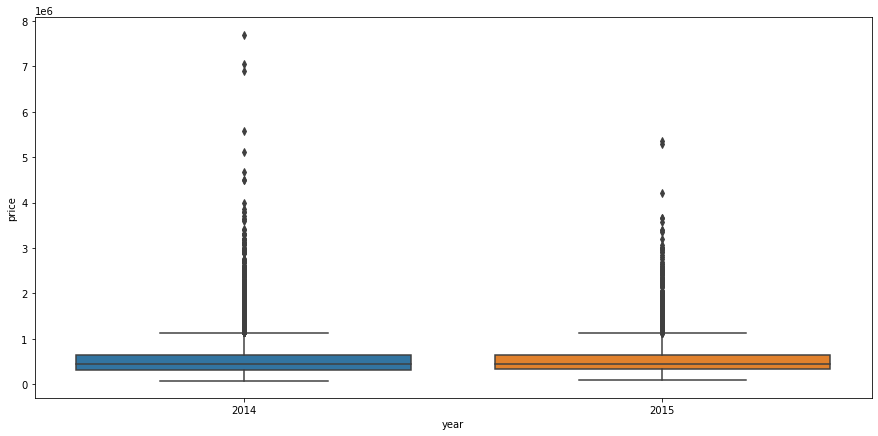

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='year',y='price',data=df)

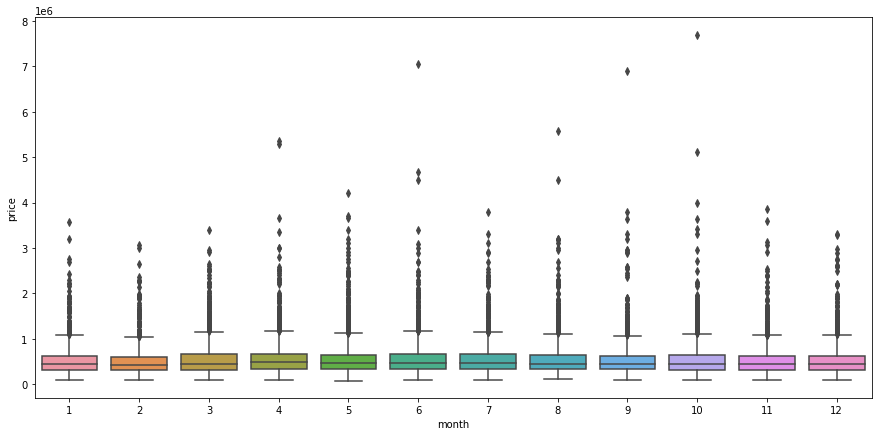

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='month',y='price',data=df)

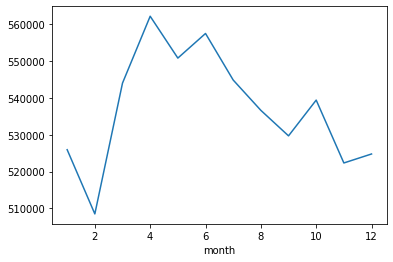

In [ ]:
df.groupby('month').mean()['price'].plot()

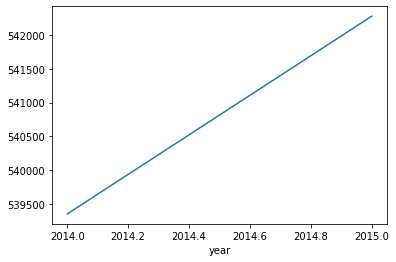

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [ ]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  month  year  
0  47.5112 -122.257           1340        5650     10  2014  
1  47.7210 -122.319           1690        7639     12  2014  
2  47.7379 -122.233           2720        8062      2  2015  
3  47.5208 -122.393           1360        5000     12  2014  
4  47.6168 -122.045           1800        7503      2  2015

In [ ]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(15117, 19)

In [ ]:
X_test.shape

(6480, 19)

## Creating a Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 428676271581.8666 - val_loss: 418890973184.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 421756824507.7333 - val_loss: 413175808000.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 414093213696.0000 - val_loss: 359946354688.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 340615904187.7333 - val_loss: 201327001600.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 173273993079.4667 - val_loss: 98677260288.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 99155489177.6000 - val_loss: 94017978368.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 95908259635.2000 - val_loss: 92319064064.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 100672818449.0667 - val_loss: 90583670784.0000
Epoch 9/400
119/119 [=

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

loss      val_loss
0  4.302369e+11  4.188910e+11
1  4.286133e+11  4.131758e+11
2  4.052567e+11  3.599464e+11
3  2.985953e+11  2.013270e+11
4  1.416395e+11  9.867726e+10

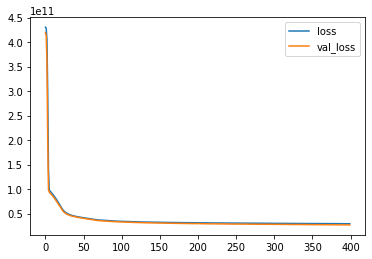

In [ ]:
losses.plot()

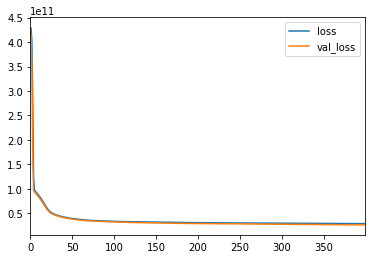

In [ ]:
losses.plot()

## Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

#### Predicting on Brand New Data

In [ ]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

101684.86255425347

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

164318.233321353

In [ ]:
r2_score(y_test,predictions)

0.796401659551268

In [ ]:
explained_variance_score(y_test,predictions)  #same as r2

0.7964070132974217

In [ ]:
df['price'].mean()

540296.5735055795

In [ ]:
df['price'].median()

450000.0

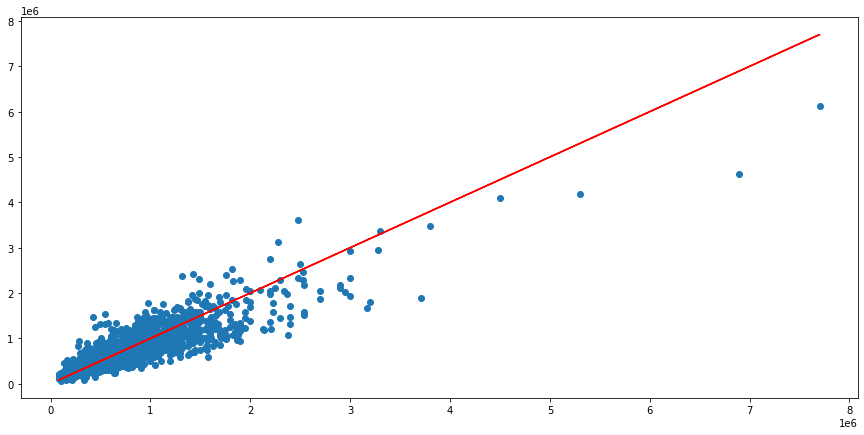

In [ ]:
# Our predictions
plt.figure(figsize=(15,7))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.values.reshape(6480, 1) - predictions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


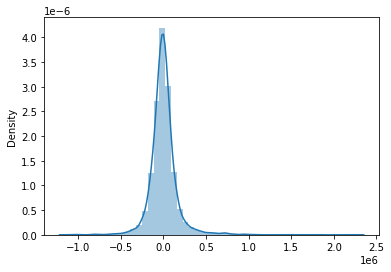

In [ ]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [ ]:
model.predict(single_house)

array([[282193.2]], dtype=float32)

In [ ]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

#Keras TF 2.0 - Classification Project

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving cancer_classification.csv to cancer_classification.csv


{'cancer_classification.csv': b'mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1\r\n17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05372999999999999,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0\r\n20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017000000000001,0.1812,0.056670000000000005,0.5435,0.7339,3.398,74.08,0.005225,0.013080000000000001,0.0186,0.0134,0.013890000000000001,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

count        mean  ...          75%         max
mean radius              569.0   14.127292  ...    15.780000    28.11000
mean texture             569.0   19.289649  ...    21.800000    39.28000
mean perimeter           569.0   91.969033  ...   104.100000   188.50000
mean area                569.0  654.889104  ...   782.700000  2501.00000
mean smoothness          569.0    0.096360  ...     0.105300     0.16340
mean compactness         569.0    0.104341  ...     0.130400     0.34540
mean concavity           569.0    0.088799  ...     0.130700     0.42680
mean concave points      569.0    0.048919  ...     0.074000     0.20120
mean symmetry            569.0    0.181162  ...     0.195700     0.30400
mean fractal dimension   569.0    0.062798  ...     0.066120     0.09744
radius error             569.0    0.405172  ...     0.478900     2.87300
texture error            569.0    1.216853  ...     1.474000     4.88500
perimeter error          569.0    2.866059  ...     3.357000    21.98000
area error               569.0   40.337079  ...    45.190000   542.20000
smoothness error         569.0    0.007041  ...     0.008146     0.03113
compactness error        569.0    0.025478  ...     0.032450     0.13540
concavity error          569.0    0.031894  ...     0.042050     0.39600
concave points error     569.0    0.011796  ...     0.014710     0.05279
symmetry error           569.0    0.020542  ...     0.023480     0.07895
fractal dimension error  569.0    0.003795  ...     0.004558     0.02984
worst radius             569.0   16.269190  ...    18.790000    36.04000
worst texture            569.0   25.677223  ...    29.720000    49.54000
worst perimeter          569.0  107.261213  ...   125.400000   251.20000
worst area               569.0  880.583128  ...  1084.000000  4254.00000
worst smoothness         569.0    0.132369  ...     0.146000     0.22260
worst compactness        569.0    0.254265  ...     0.339100     1.05800
worst concavity          569.0    0.272188  ...     0.382900     1.25200
worst concave points     569.0    0.114606  ...     0.161400     0.29100
worst symmetry           569.0    0.290076  ...     0.317900     0.66380
worst fractal dimension  569.0    0.083946  ...     0.092080     0.20750
benign_0__mal_1          569.0    0.627417  ...     1.000000     1.00000

[31 rows x 8 columns]

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

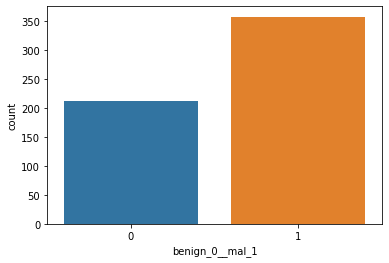

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)  #to see if dataset is balanced

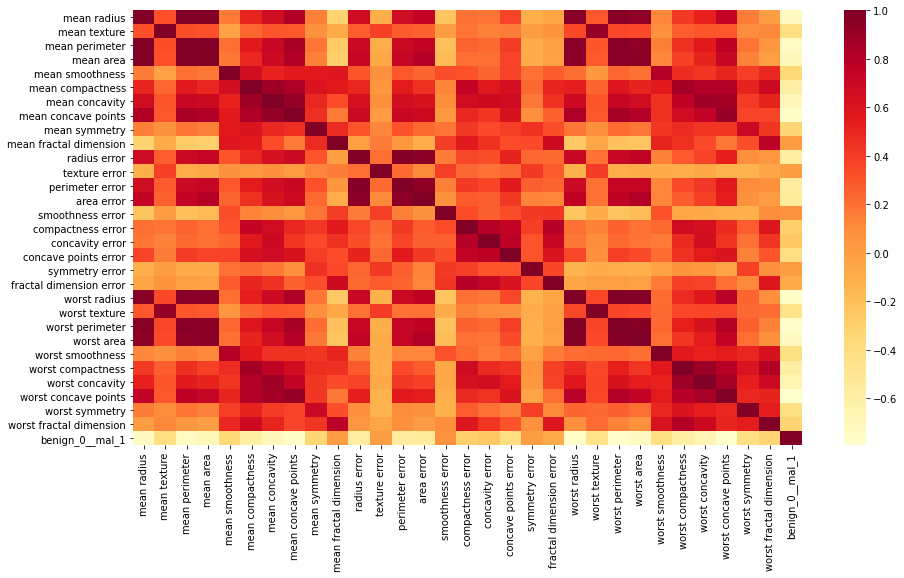

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap="YlOrRd")

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

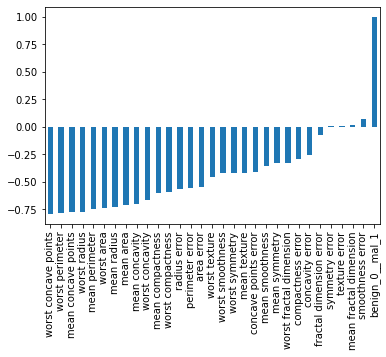

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

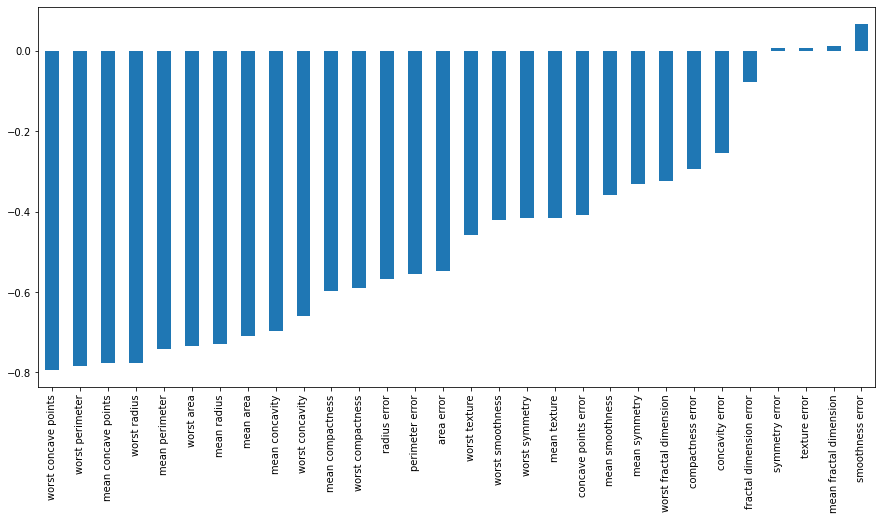

In [ ]:
plt.figure(figsize=(15,7))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [81]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [82]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6933 - val_loss: 0.6765
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6690 - val_loss: 0.6547
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6411 - val_loss: 0.6256
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5861
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5731 - val_loss: 0.5433
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5301 - val_loss: 0.4960
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4774 - val_loss: 0.4441
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4283 - val_loss: 0.3917
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3823 - val_loss: 0.3405
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3336 - val_loss: 0.2927
Epoch 11

In [ ]:
# model.history.history

In [83]:
model_loss = pd.DataFrame(model.history.history)

In [84]:
model_loss

loss  val_loss
0    0.687621  0.676527
1    0.664393  0.654712
2    0.638950  0.625631
3    0.601679  0.586138
4    0.561890  0.543260
..        ...       ...
595  0.012416  0.254273
596  0.012867  0.267418
597  0.013676  0.242604
598  0.017864  0.259920
599  0.020594  0.335438

[600 rows x 2 columns]

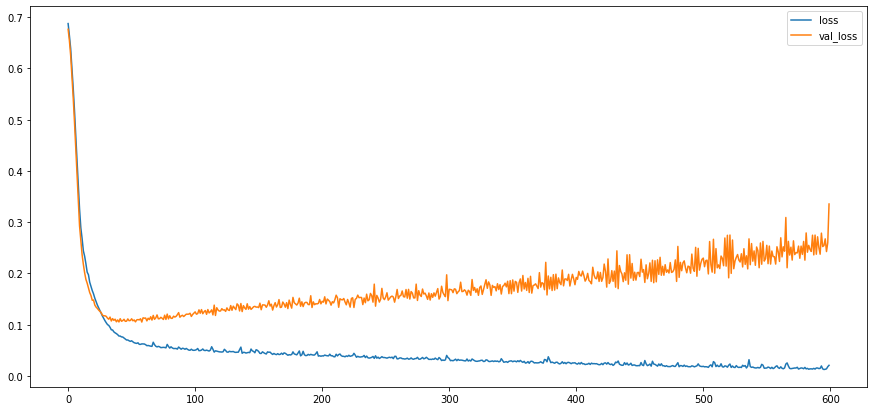

In [87]:
model_loss.plot(figsize=(15,7))

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [88]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [90]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6941 - val_loss: 0.6743
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6629 - val_loss: 0.6498
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6422 - val_loss: 0.6181
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.5745
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5681 - val_loss: 0.5263
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5138 - val_loss: 0.4759
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4703 - val_loss: 0.4248
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4233 - val_loss: 0.3756
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3721 - val_loss: 0.3335
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3257 - val_loss: 0.2960
Epoch 11

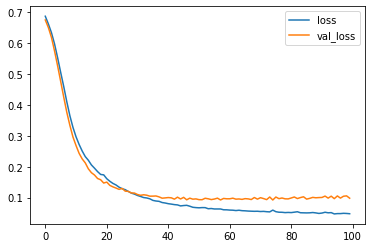

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [93]:
from tensorflow.keras.layers import Dropout

In [94]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [95]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7055 - val_loss: 0.6756
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6838 - val_loss: 0.6638
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6520
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6524 - val_loss: 0.6295
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6619 - val_loss: 0.6061
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6176 - val_loss: 0.5789
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6019 - val_loss: 0.5493
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5877 - val_loss: 0.5184
Epoch 9/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5597 - val_loss: 0.4870
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5365 - val_loss: 0.4584
Epoch 1

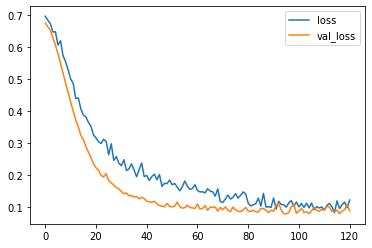

In [96]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [97]:
predictions = np.argmax(model.predict(X_test), axis=-1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [101]:
predictions = (model.predict(X_test)>0.5).astype("int32")
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [104]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


#Keras Final Project

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [105]:
import pandas as pd

In [106]:
from google.colab import files
files.upload()

Saving lending_club_info.csv to lending_club_info.csv


{'lending_club_info.csv': b'LoanStatNew,Description\r\nloan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."\r\nterm,The number of payments on the loan. Values are in months and can be either 36 or 60.\r\nint_rate,Interest Rate on the loan\r\ninstallment,The monthly payment owed by the borrower if the loan originates.\r\ngrade,LC assigned loan grade\r\nsub_grade,LC assigned loan subgrade\r\nemp_title,The job title supplied by the Borrower when applying for the loan.*\r\nemp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. \r\nhome_ownership,"The home ownership status provided by the borrower during registration\xc2\xa0or obtained from the credit report.\xc2\xa0Our values are: RENT, OWN, MORTGAGE, OTHER"\r\nannual_inc,The self-reported annual income provided by the borrow

In [107]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [108]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [109]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [110]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [112]:
from google.colab import files
files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [113]:
df = pd.read_csv('lending_club_loan_two.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

## Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [116]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

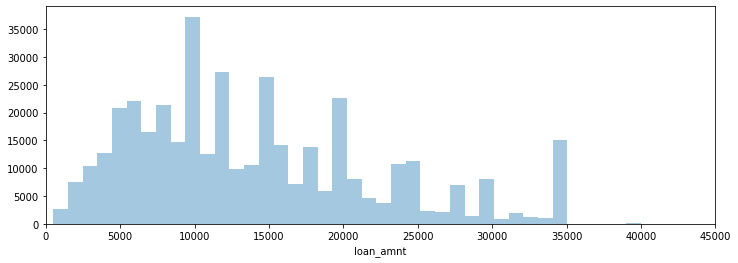

In [118]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [120]:
df.corr()

loan_amnt  int_rate  ...  mort_acc  pub_rec_bankruptcies
loan_amnt              1.000000  0.168921  ...  0.222315             -0.106539
int_rate               0.168921  1.000000  ... -0.082583              0.057450
installment            0.953929  0.162758  ...  0.193694             -0.098628
annual_inc             0.336887 -0.056771  ...  0.236320             -0.050162
dti                    0.016636  0.079038  ... -0.025439             -0.014558
open_acc               0.198556  0.011649  ...  0.109205             -0.027732
pub_rec               -0.077779  0.060986  ...  0.011552              0.699408
revol_bal              0.328320 -0.011280  ...  0.194925             -0.124532
revol_util             0.099911  0.293659  ...  0.007514             -0.086751
total_acc              0.223886 -0.036404  ...  0.381072              0.042035
mort_acc               0.222315 -0.082583  ...  1.000000              0.027239
pub_rec_bankruptcies  -0.106539  0.057450  ...  0.027239              1.000000

[12 rows x 12 columns]

**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

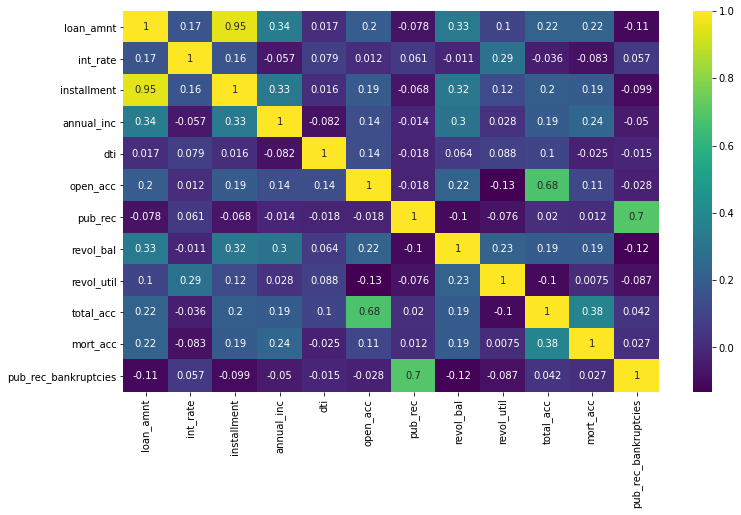

In [122]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [123]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [124]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


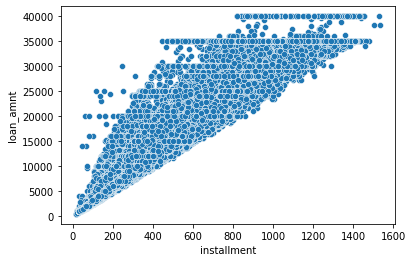

In [125]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

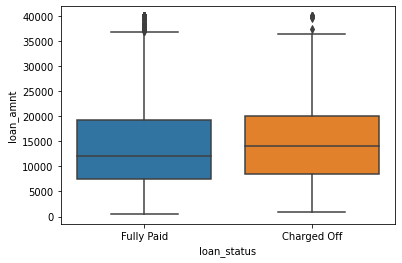

In [126]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [127]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std  ...      50%      75%      max
loan_status                                       ...                           
Charged Off   77673.0  15126.300967  8505.090557  ...  14000.0  20000.0  40000.0
Fully Paid   318357.0  13866.878771  8302.319699  ...  12000.0  19225.0  40000.0

[2 rows x 8 columns]

**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [128]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [129]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

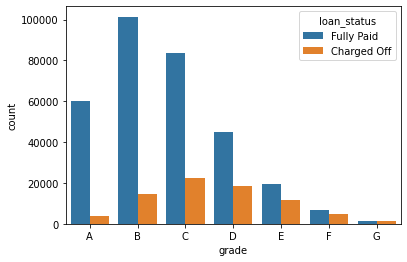

In [135]:
sort_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,order=sort_order,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status**

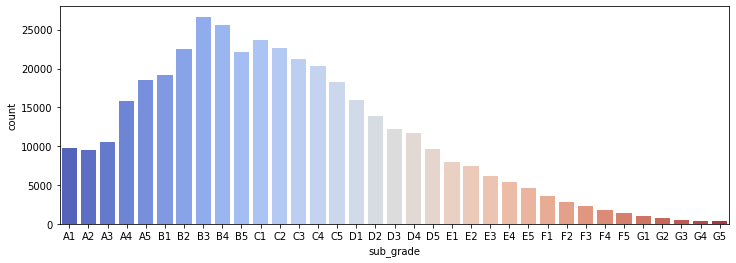

In [134]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

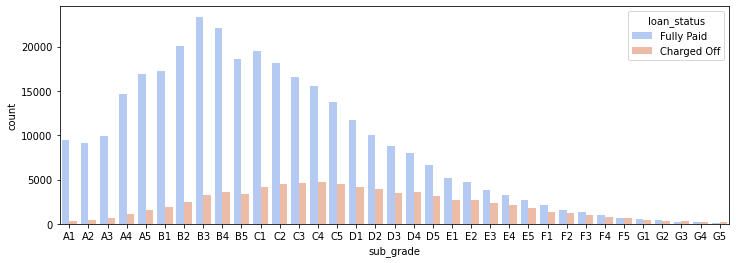

In [136]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

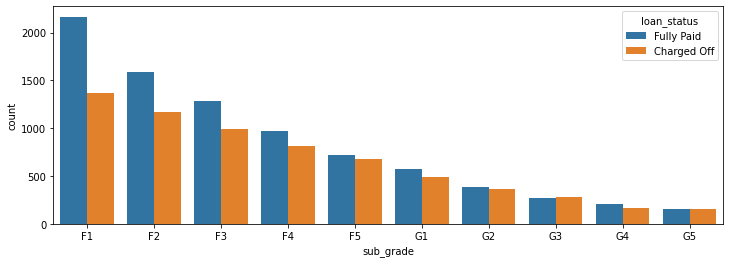

In [137]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**TASK: Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [138]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [139]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [140]:
df[['loan_repaid','loan_status']]

loan_repaid  loan_status
0                 1   Fully Paid
1                 1   Fully Paid
2                 1   Fully Paid
3                 1   Fully Paid
4                 0  Charged Off
...             ...          ...
396025            1   Fully Paid
396026            1   Fully Paid
396027            1   Fully Paid
396028            1   Fully Paid
396029            1   Fully Paid

[396030 rows x 2 columns]

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

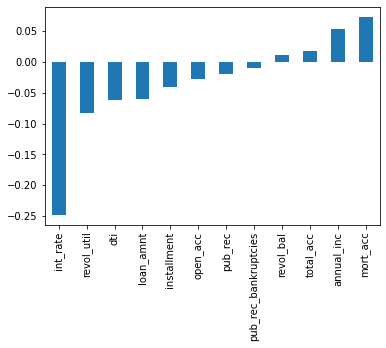

In [141]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
## Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [142]:
df.head()

loan_amnt  ... loan_repaid
0    10000.0  ...           1
1     8000.0  ...           1
2    15600.0  ...           1
3     7200.0  ...           1
4    24375.0  ...           0

[5 rows x 28 columns]

## Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [143]:
len(df)

396030

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**TASK: Create a Series that displays the total count of missing values per column.**

In [146]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [147]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [148]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [149]:
df['emp_title'].nunique()

173105

In [150]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Acushnet Golf                              1
Jewelry Designer                           1
Synnefo Technology Solutions               1
Hicks, Motto & Ehrlich                     1
Southeast Metro Stormwater Authority       1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [151]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [152]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [153]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

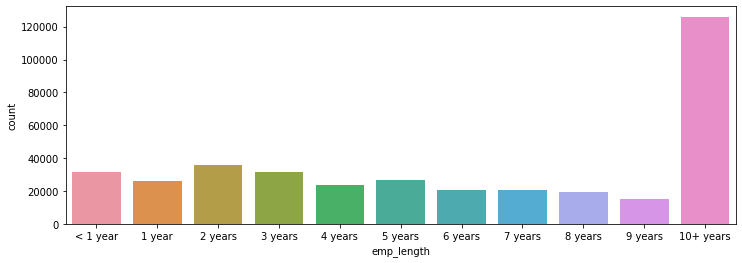

In [154]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

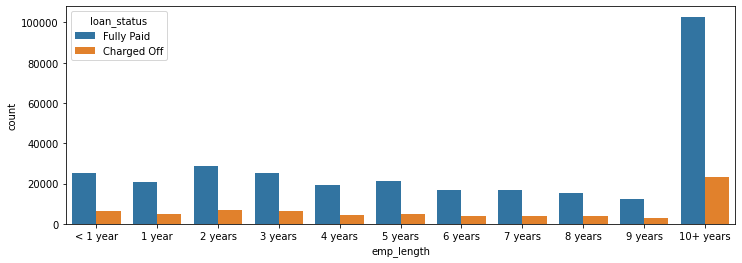

In [155]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [156]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [157]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [158]:
emp_len = emp_co/emp_fp

In [159]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

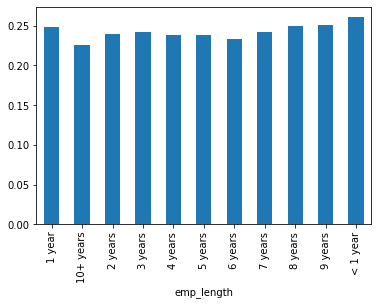

In [160]:
emp_len.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [161]:
df = df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [162]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [163]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [164]:
df = df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [165]:
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [166]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [167]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [168]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [169]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
total_acc_avg[2.0]

0.0

In [170]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [171]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [172]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [173]:
df = df.dropna()

In [174]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [175]:
feat_info("term")

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [176]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [177]:
# Or just use .map()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [178]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [179]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [180]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [181]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [182]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [183]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [184]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [185]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [186]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [187]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [188]:
df["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [189]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [190]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [192]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [193]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [194]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [195]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [196]:
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [197]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

----
----

## OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [ ]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [199]:
from sklearn.preprocessing import MinMaxScaler

In [200]:
scaler = MinMaxScaler()

In [201]:
X_train = scaler.fit_transform(X_train)

In [202]:
X_test = scaler.transform(X_test)

## Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [ ]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [204]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

we can do early stopping

In [205]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3598 - val_loss: 0.2656
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2665 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2629 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2613 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2614 - val_loss: 0.2630
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2599 - val_loss: 0.2618
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2613
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2596 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

**TASK: OPTIONAL: Save your model.**

In [206]:
from tensorflow.keras.models import load_model

In [207]:
model.save('full_data_project_model.h5')  

## Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [208]:
losses = pd.DataFrame(model.history.history)

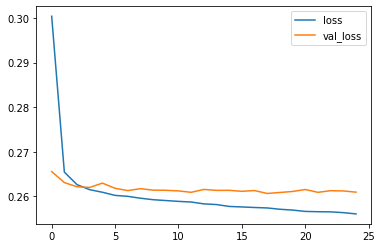

In [209]:
losses[['loss','val_loss']].plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [210]:
from sklearn.metrics import classification_report,confusion_matrix

In [212]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [213]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [214]:
confusion_matrix(y_test,predictions)

array([[ 6785,  8873],
       [   49, 63337]])

**TASK: Given the customer below, would you offer this person a loan?**

In [229]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [230]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [231]:
(model.predict(new_customer)>0.5).astype("int32")

array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [232]:
df.iloc[random_ind]['loan_repaid']

1.0